   storeid                           name  StoreDuration  TotalRevenue
0      412             Gasless Cycle Shop             10     4839.2987
1      574               Fifth Bike Store             10     8663.1794
2      716  Famous Bike Sales and Service             10     2931.9869
3      926                   Unique Bikes             10    41335.5260
4     1018          Trusted Catalog Store             10    71038.1450


C:\Users\Michelle Wong\AppData\Local\Temp\ipykernel_21744\488388286.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('summer')  # You can try other colormaps like 'Reds', 'YlGnBu'


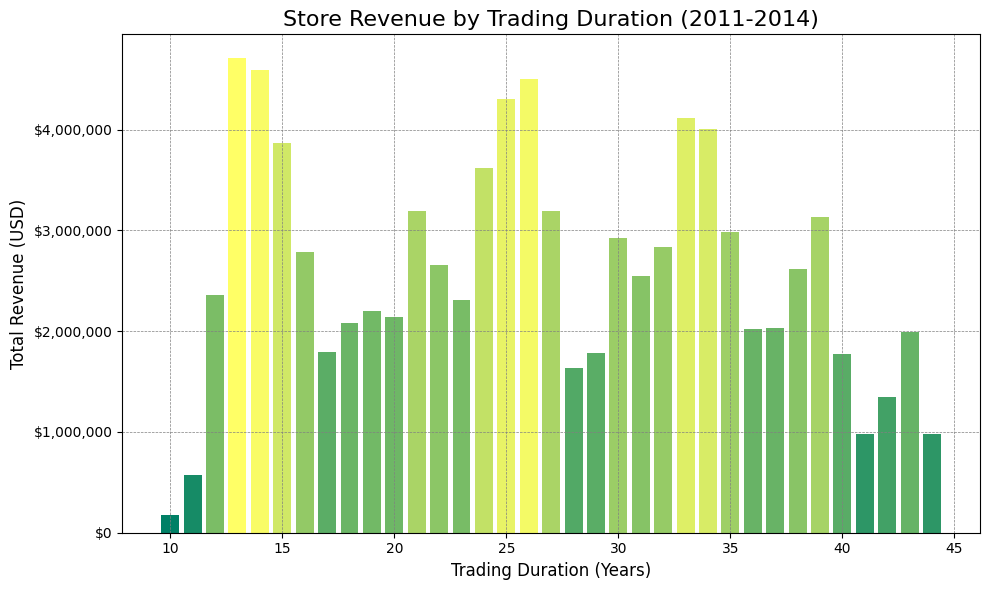

In [28]:
from sqlalchemy import create_engine
import pandas as pd

# Create the SQLAlchemy engine using the pyodbc driver
connection_string = "mssql+pyodbc://DESKTOP-19LPOE8\\SQLEXPRESS/AdventureWorks2022?driver=ODBC+Driver+17+for+SQL+Server"
engine = create_engine(connection_string)

# SQL query to fetch data from the view
query = """
SELECT 
    c.storeid, 
    s.name, 
    Year(duedate) - YearOpened as StoreDuration, 
    sum(TotalDue) as TotalRevenue  
FROM AdventureWorks2022.Sales.SalesOrderHeader soh  
LEFT JOIN AdventureWorks2022.Sales.Customer c 
    ON soh.CustomerID = c.CustomerID
LEFT JOIN Sales.vStoreWithDemographics s 
    ON s.BusinessEntityID = c.storeid
WHERE c.storeid IS NOT NULL
GROUP BY c.storeid, s.name, Year(duedate) - YearOpened 
ORDER BY Year(duedate) - YearOpened, c.storeid
"""

# Load data into pandas DataFrame
df = pd.read_sql(query, engine)

# Display the first few rows of the data
print(df.head())

# Close the connection
engine.dispose()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Assuming df is your DataFrame
df_grouped = df.groupby('StoreDuration').agg({'TotalRevenue': 'sum'}).reset_index()

# Normalize the TotalRevenue values to the range [0, 1] for colormap
norm = mcolors.Normalize(vmin=df_grouped['TotalRevenue'].min(), vmax=df_grouped['TotalRevenue'].max())

# Create a colormap which ranges from light to dark
cmap = cm.get_cmap('summer')  # You can try other colormaps like 'Reds', 'YlGnBu'

# Create a list of colors from the colormap for each bar based on TotalRevenue
colors = [cmap(norm(value)) for value in df_grouped['TotalRevenue']]

# Bar Chart
plt.figure(figsize=(10, 6))

# Plotting the bar chart with color mapping
bars = plt.bar(df_grouped['StoreDuration'], df_grouped['TotalRevenue'], color=colors)

# Add title and labels
plt.title('Store Revenue by Trading Duration (2011-2014)', fontsize=16, color='black')
plt.xlabel('Trading Duration (Years)', fontsize=12, color='black')
plt.ylabel('Total Revenue (USD)', fontsize=12, color='black')

# Format y-axis to display the USD sign ($) with commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '${:,}'.format(int(x))))

# Customize the plot appearance
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Set the color for ticks
plt.xticks(color='black')
plt.yticks(color='black')

# Add gridlines for better readability
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()